<a href="https://colab.research.google.com/github/amisinghal/a_problem_with_presidents/blob/main/Amisha_Singhal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#importing the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plot
import math

In [21]:
#reading the dataset
data = pd.read_csv("/content/U.S. Presidents Birth and Death Information - Sheet1.csv", header=0)

#making a copy of the dataset to retain the original for reference
data_duplicate= data.copy()


In [22]:
#to fetch the current date (will be used to calculate age for those who are alive)
today= datetime.now().strftime("%b %d, %Y")

#filling the empty columns of death date by todays date and place with ALIVE
data_duplicate["DEATH DATE"]= data_duplicate["DEATH DATE"].fillna(today)
data_duplicate["LOCATION OF DEATH"]= data_duplicate["LOCATION OF DEATH"].fillna("Alive")

data_duplicate["BIRTH DATE"]= pd.to_datetime(data_duplicate["BIRTH DATE"])
data_duplicate["DEATH DATE"]= pd.to_datetime(data_duplicate["DEATH DATE"])


In [23]:
#To get the year of birth separately
data_duplicate["year_of_birth"]= pd.DatetimeIndex(data_duplicate["BIRTH DATE"]).year

#Calculating total number of years, months and days a president has lived.
data_duplicate["lived_years"]= (data_duplicate["DEATH DATE"] - data_duplicate['BIRTH DATE'])/np.timedelta64(1, 'Y')
data_duplicate["lived_months"]= (data_duplicate["DEATH DATE"] - data_duplicate['BIRTH DATE'])/np.timedelta64(1, 'M')
data_duplicate["lived_days"]= (data_duplicate["DEATH DATE"] - data_duplicate['BIRTH DATE'])/np.timedelta64(1, 'D')


In [24]:
#sorting the created data and fetching the top 10.
longest_to_shortest = data_duplicate.sort_values(by=['lived_days'], ascending=False).head(10)
shortest_to_longest = data_duplicate.sort_values(by=['lived_days'], ascending=True).head(10)

#Reverting the changes made earlier
longest_to_shortest["DEATH DATE"] = longest_to_shortest["DEATH DATE"].replace(np.nan, today)
shortest_to_longest["DEATH DATE"] = shortest_to_longest["DEATH DATE"].replace(np.nan, today)


In [25]:
shortest_to_longest

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,year_of_birth,lived_years,lived_months,lived_days
33,John F. Kennedy,1917-05-29,"Brookline, Mass.",1963-11-22,"Dallas, Texas",1917.0,46.484185,557.810222,16978.0
19,James A. Garfield,1831-11-19,"Cuyahoga Co., Ohio",1881-09-19,"Elberon, New Jersey",1831.0,49.835383,598.024600,18202.0
10,James K. Polk,1795-11-02,"Mecklenburg Co., N.C.",1849-06-15,"Nashville, Tennessee",1795.0,53.616433,643.397195,19583.0
15,Abraham Lincoln,1809-02-12,"LaRue Co., Kentucky",1865-04-15,"Washington, D.C.",1809.0,56.170900,674.050802,20516.0
20,Chester Arthur,1829-10-05,"Fairfield, Vermont",1886-11-18,"New York, New York",1829.0,57.120954,685.451447,20863.0
27,Warren G. Harding,1865-11-02,"Morrow County, Ohio",1923-08-02,"San Francisco, Cal.",1865.0,57.745197,692.942360,21091.0
23,William McKinley,1843-01-29,"Niles, Ohio",1901-09-14,"Buffalo, New York",1843.0,58.624065,703.488778,21412.0
24,Theodore Roosevelt,1858-10-27,"New York, New York",1919-01-06,"Oyster Bay, New York",1858.0,60.192886,722.314627,21985.0
28,Calvin Coolidge,1872-07-04,"Plymouth, Vermont",1933-01-05,"Northampton, Mass.",1872.0,60.505007,726.060083,22099.0
42,Barack Obama,1961-08-04,"Honolulu, Hawaii",2023-07-13,Alive,1961.0,61.939670,743.276043,22623.0


In [26]:
longest_to_shortest

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,year_of_birth,lived_years,lived_months,lived_days
37,Jimmy Carter,1924-10-01,"Plains, Georgia",2023-07-13,Alive,1924.0,98.780947,1185.371363,36079.0
39,George Bush,1924-06-12,"Milton, Mass.",2018-11-30,"Houston, Texas",1924.0,94.468743,1133.624920,34504.0
36,Gerald Ford,1913-07-14,"Omaha, Nebraska",2006-12-26,"Rancho Mirage, Cal.",1913.0,93.452980,1121.435758,34133.0
38,Ronald Reagan,1911-02-06,"Tampico, Illinois",2004-06-05,"Los Angeles, Cal.",1911.0,93.329774,1119.957289,34088.0
1,John Adams,1735-10-30,"Quincy, Mass.",1826-07-04,"Quincy, Mass.",1735.0,90.676742,1088.120906,33119.0
29,Herbert Hoover,1874-08-10,"West Branch, Iowa",1964-10-20,"New York, New York",1874.0,90.194871,1082.338446,32943.0
31,Harry S. Truman,1884-05-08,"Lamar, Missouri",1972-12-26,"Kansas City, Missouri",1884.0,88.634264,1063.611162,32373.0
3,James Madison,1751-03-16,"Port Conway, Va.",1836-06-28,"Orange Co., Va.",1751.0,85.285803,1023.429639,31150.0
2,Thomas Jefferson,1743-04-13,"Albemarle Co., Va.",1826-07-04,"Albemarle Co., Va.",1743.0,83.224159,998.689911,30397.0
35,Richard Nixon,1913-01-09,"Yorba Linda, Cal.",1994-04-22,"New York, New York",1913.0,81.282983,975.395799,29688.0


In [27]:
lived_days_data= data_duplicate["lived_days"]
lived_years_data = data_duplicate["lived_years"]

#to calculate frequency and also weight average
lived_years_int_list = [int(num) for num in lived_years_data if not math.isnan(num)]
my_series = pd.Series(lived_years_int_list)
value_counts = my_series.value_counts()

#creating dictionary to get key value pair of the value counts
dict_value_counts= value_counts.to_dict()
values_with_weight= []
weight_values=[]

# assigning the weights accordign to the frequency of the age: higher frequency gets higher weight.
for key, value in dict_value_counts.items():
  if value==3:
    values_with_weight.append(key*1)
    weight_values.append(1)
  elif value==2:
    values_with_weight.append(key*0.5)
    weight_values.append(0.5)
  else:
    values_with_weight.append(key*0.25)
    weight_values.append(0.25)




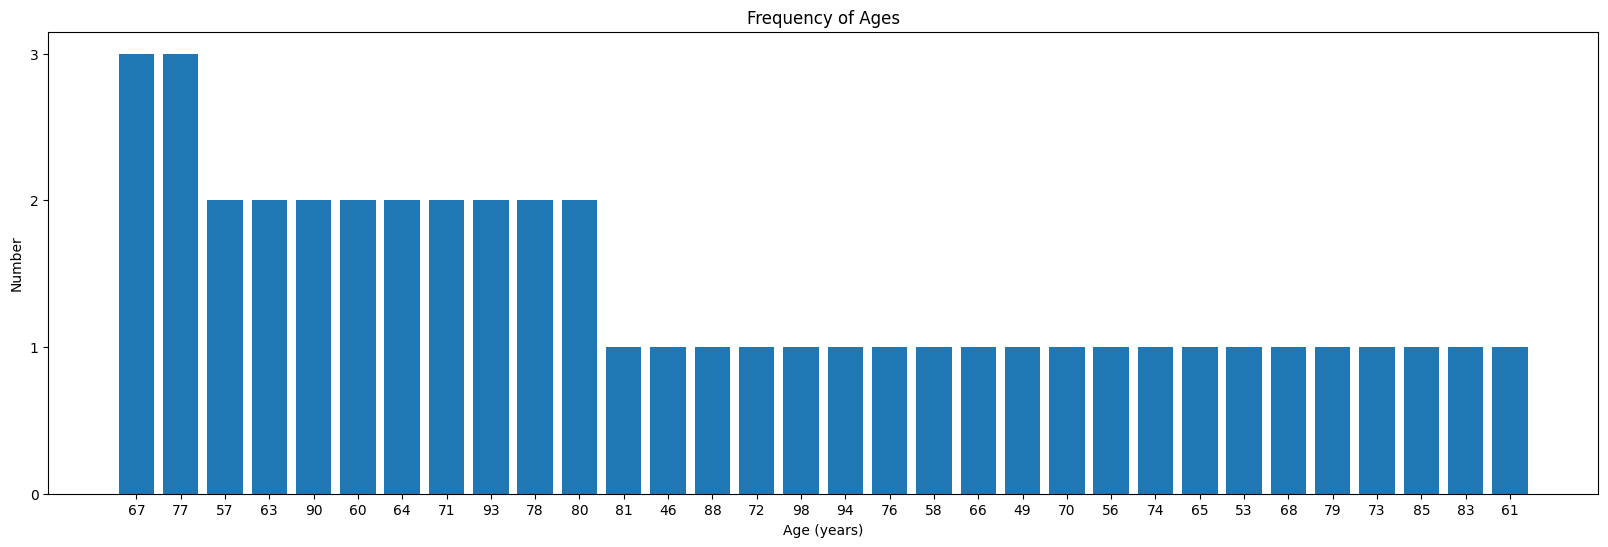

In [28]:
#Frequency of Ages

xcoords = list(range(len(value_counts)))

plot.figure(figsize=(20, 6))
plot.bar(xcoords, value_counts)
plot.xlabel("Age (years)")
plot.ylabel("Number")
plot.title("Frequency of Ages")

plot.xticks(xcoords, value_counts.index)
plot.yticks(range(value_counts.max() + 1))
plot.show()

In [29]:
#calculating the statistics mean, median, weighted_mean
mean= lived_days_data.mean()
median= lived_days_data.median()
weighted_mean= sum(values_with_weight)/sum(weight_values)
mode =lived_years_data.mode()[0]

max = lived_days_data.max()
min = lived_days_data.min()

std_dev = lived_days_data.std()

stats_data = [ ['Mean', mean, mean/365], ['Weighted_Mean', weighted_mean*365, weighted_mean], ['Median', median, median/365], ['Mode', mode*365, mode], ['Max', max, max/365], ['Min', min, min/365], ['Standard_Deviation', std_dev, std_dev/365] ]
stats_df = pd.DataFrame(stats_data, columns=['Age Statistic', 'in Days', 'in Years'])
stats_df


,Age Statistic,in Days,in Years
0,Mean,26451.511111,72.469893
1,Weighted_Mean,26272.234043,71.978723
2,Median,26227.000000,71.854795
3,Mode,16966.727585,46.484185
4,Max,36079.000000,98.846575
5,Min,16978.000000,46.515068
6,Standard_Deviation,4603.263524,12.611681


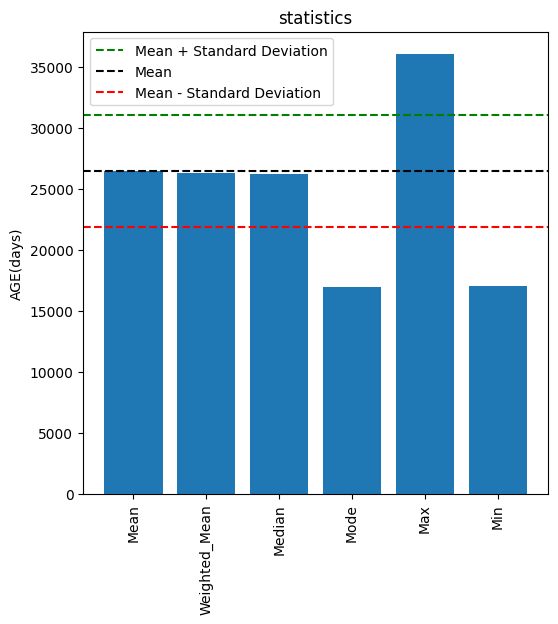

In [30]:
#plotting the statistics
xlabel= stats_df["Age Statistic"]
xlabel = xlabel[:-1].to_list()
xcoords= range(len(xlabel))

ycoords= stats_df['in Days']
ycoords = ycoords[:-1].to_list()

plot.figure(figsize=(6, 6))
plot.bar(xcoords, ycoords)
plot.ylabel("AGE(days)")
plot.title("statistics")

plot.axhline(y = mean + std_dev, color='green', linestyle='--', label="Mean + SD")
plot.axhline(y = mean, color='black', linestyle='--', label="Mean")
plot.axhline(y = mean - std_dev, color='red', linestyle='--', label="Mean - SD")

plot.xticks(xcoords, xlabel)
plot.xticks(rotation= 90)
plot.legend(labels=['Mean + Standard Deviation', 'Mean', 'Mean - Standard Deviation'])
plot.show()